In [331]:
import pandas as pd
import matplotlib.pyplot as plt


**1. Carga los datos y crea un DataFrame**

In [332]:
data = {
    'ID Empleado': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Nombre': ['Empleado 1', 'Empleado 2', 'Empleado 3', 'Empleado 4', 'Empleado 5',
               'Empleado 6', 'Empleado 7', 'Empleado 8', 'Empleado 9', 'Empleado 10'],
    'Edad': [30, 25, 35, 28, 40, 45, 32, 29, 33, 27],
    'Género': ['Masculino', 'Femenino', 'Masculino', 'Femenino', 'Masculino',
               'Masculino', 'Femenino', 'Otro', 'Masculino', 'Femenino'],
    'Cargo': ['Gerente', 'Analista', 'Analista', 'Asistente', 'Gerente',
              'Analista', 'Analista', 'Gerente', 'Asistente', 'Gerente'],
    'Salario Anual ($)': [80000, 55000, 60000, 48000, 95000, 105000, 62000, 75000, 52000, 90000],
    'Años en la Empresa': [5, 2, 8, 3, 10, 12, 6, 4, 7, 1]
}

df=pd.DataFrame(data)
df

,ID Empleado,Nombre,Edad,Género,Cargo,Salario Anual ($),Años en la Empresa
0,1,Empleado 1,30,Masculino,Gerente,80000,5
1,2,Empleado 2,25,Femenino,Analista,55000,2
2,3,Empleado 3,35,Masculino,Analista,60000,8
3,4,Empleado 4,28,Femenino,Asistente,48000,3
4,5,Empleado 5,40,Masculino,Gerente,95000,10
5,6,Empleado 6,45,Masculino,Analista,105000,12
6,7,Empleado 7,32,Femenino,Analista,62000,6
7,8,Empleado 8,29,Otro,Gerente,75000,4
8,9,Empleado 9,33,Masculino,Asistente,52000,7
9,10,Empleado 10,27,Femenino,Gerente,90000,1


**2.Calcula estadísticas descriptivas básicas para las columnas numéricas (Edad, Salario Anual ($), Años en la Empresa).**

In [333]:
estadistica=df[['Edad', 'Salario Anual ($)', 'Años en la Empresa']].describe()
estadistica

,Edad,Salario Anual ($),Años en la Empresa
count,10.000000,10.000000,10.000000
mean,32.400000,72200.000000,5.800000
std,6.186006,19786.639712,3.521363
min,25.000000,48000.000000,1.000000
25%,28.250000,56250.000000,3.250000
50%,31.000000,68500.000000,5.500000
75%,34.500000,87500.000000,7.750000
max,45.000000,105000.000000,12.000000


**3.Visualiza la distribución de edades en un histograma.**

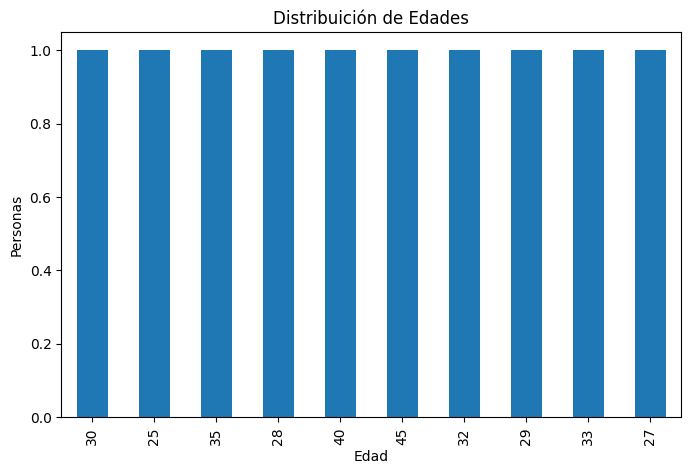

In [334]:
edades=df['Edad'].value_counts()
edades.plot(kind='bar', figsize=(8,  5))
plt.xlabel('Edad')
plt.ylabel('Personas')
plt.title('Distribuición de Edades')
plt.show()

**4.Encuentra el género predominante entre los empleados.**

In [335]:
genero_predominante = df['Género'].value_counts().idxmax()
print(f'Género predominante entre los empleados: {genero_predominante}')

Género predominante entre los empleados: Masculino


**5.Identifica el cargo con el salario anual más alto.**

In [338]:
# Agrupar por el cargo y calcular el salario anual máximo en cada grupo
cargo_salario_maximo = df.groupby('Cargo')['Salario Anual ($)'].max()

# Encontrar el cargo con el salario anual más alto
cargo_con_salario_maximo = cargo_salario_maximo.idxmax()
salario_maximo = cargo_salario_maximo.max()
print(f"Cargo con el salario anual más alto: {cargo_con_salario_maximo}")
print(f"Salario anual más alto: ${salario_maximo:.2f}")

Cargo con el salario anual más alto: Analista
Salario anual más alto: $105000.00


**6.Calcula el promedio de años en la empresa para todos los empleados.**

In [342]:
promedio_años_en_la_empresa = df['Años en la Empresa'].mean()
print(f"Promedio de años en la empresa: {promedio_años_en_la_empresa}")

Promedio de años en la empresa: 5.8


**7.Encuentra al empleado más antiguo (mayor cantidad de años en la empresa).**

In [356]:

empleado_mas_antiguo = df.groupby('Nombre')['Años en la Empresa'].max()
empleado_mas_antiguo = empleado_mas_antiguo.idxmax()

print(f'Empleado con mayor cantidad de años en la empresa: {empleado_mas_antiguo}')


Empleado con mayor cantidad de años en la empresa: Empleado 6


**8.¿Hay alguna correlación entre la edad y el salario anual? Calcula la matriz de correlación y visualízala.**


In [362]:
matriz_correlacion = df[['Edad', 'Salario Anual ($)']].corr().round(3)
matriz_correlacion


,Edad,Salario Anual ($)
Edad,1.000,0.596
Salario Anual ($),0.596,1.000


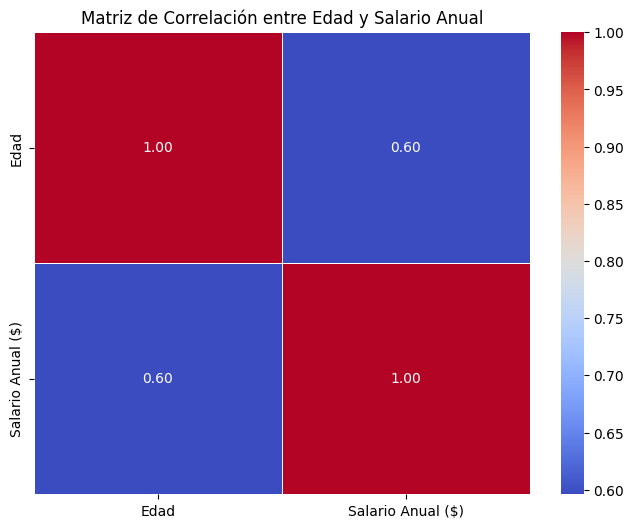

In [363]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación entre Edad y Salario Anual')
plt.show()